### Creating the dataframe and importing the libraries to use.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [2]:
music.head(5)

,duration,loudness,bpm
0,184,18,105
1,134,34,90
2,243,43,78
3,186,36,75
4,122,22,120


In [3]:
music.shape

(30, 3)

### Everything's the Same
### Switching KNN to a regression is a simple process. In our previous models, each of the  𝑘 oberservations voted for a category. As a regression they vote instead for a value. Then instead of taking the most popular response, the algorithm averages all of the votes. If you have weights you perform a weighted average.

### It's really that simple.

### Let's go over a quick example just to confirm your understanding.

### Let's stick with the world of music. Instead of trying to classify songs as rock or jazz, lets take the same data with an additional column: beats per minute, or BPM. Can we train our model to predict BPM?

### First let's try to predict just in terms of loudness, as this will be easier to represent graphically.

### To summarize, there is a bias-variance trade-off associated with the choice of k in k-fold cross-validation. Typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance.

    loudness
0         18
1         34
2         43
3         36
4         22
5          9
6         29
7         22
8         10
9         24
10        20
11        10
12        17
13        51
14         7
15        13
16        19
17        12
18        21
19        22
20        16
21        18
22         4
23        23
24        34
25        19
26        14
27        11
28        37
29        42
[[  0. ]
 [  0.1]
 [  0.2]
 [  0.3]
 [  0.4]
 [  0.5]
 [  0.6]
 [  0.7]
 [  0.8]
 [  0.9]
 [  1. ]
 [  1.1]
 [  1.2]
 [  1.3]
 [  1.4]
 [  1.5]
 [  1.6]
 [  1.7]
 [  1.8]
 [  1.9]
 [  2. ]
 [  2.1]
 [  2.2]
 [  2.3]
 [  2.4]
 [  2.5]
 [  2.6]
 [  2.7]
 [  2.8]
 [  2.9]
 [  3. ]
 [  3.1]
 [  3.2]
 [  3.3]
 [  3.4]
 [  3.5]
 [  3.6]
 [  3.7]
 [  3.8]
 [  3.9]
 [  4. ]
 [  4.1]
 [  4.2]
 [  4.3]
 [  4.4]
 [  4.5]
 [  4.6]
 [  4.7]
 [  4.8]
 [  4.9]
 [  5. ]
 [  5.1]
 [  5.2]
 [  5.3]
 [  5.4]
 [  5.5]
 [  5.6]
 [  5.7]
 [  5.8]
 [  5.9]
 [  6. ]
 [  6.1]
 [  6.2]
 [  6.3]
 [  6.4]
 [  6.5]
 [ 

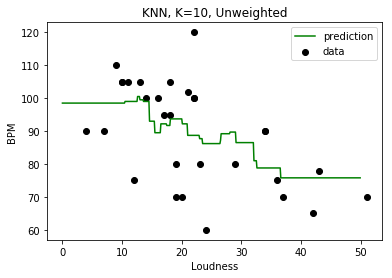

In [4]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

print(X)

# Set up our prediction line.
#numpy.arange([start, ]stop, [step, ]dtype=None)
T = np.arange(0, 50, 0.1)[:, np.newaxis]

print (T)

print (T.shape)

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

print (Y_)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.xlabel('Loudness')
plt.ylabel('BPM')
plt.legend()
plt.title('KNN, K=10, Unweighted')
plt.show()

    loudness
0         18
1         34
2         43
3         36
4         22
5          9
6         29
7         22
8         10
9         24
10        20
11        10
12        17
13        51
14         7
15        13
16        19
17        12
18        21
19        22
20        16
21        18
22         4
23        23
24        34
25        19
26        14
27        11
28        37
29        42
[[  0. ]
 [  0.1]
 [  0.2]
 [  0.3]
 [  0.4]
 [  0.5]
 [  0.6]
 [  0.7]
 [  0.8]
 [  0.9]
 [  1. ]
 [  1.1]
 [  1.2]
 [  1.3]
 [  1.4]
 [  1.5]
 [  1.6]
 [  1.7]
 [  1.8]
 [  1.9]
 [  2. ]
 [  2.1]
 [  2.2]
 [  2.3]
 [  2.4]
 [  2.5]
 [  2.6]
 [  2.7]
 [  2.8]
 [  2.9]
 [  3. ]
 [  3.1]
 [  3.2]
 [  3.3]
 [  3.4]
 [  3.5]
 [  3.6]
 [  3.7]
 [  3.8]
 [  3.9]
 [  4. ]
 [  4.1]
 [  4.2]
 [  4.3]
 [  4.4]
 [  4.5]
 [  4.6]
 [  4.7]
 [  4.8]
 [  4.9]
 [  5. ]
 [  5.1]
 [  5.2]
 [  5.3]
 [  5.4]
 [  5.5]
 [  5.6]
 [  5.7]
 [  5.8]
 [  5.9]
 [  6. ]
 [  6.1]
 [  6.2]
 [  6.3]
 [  6.4]
 [  6.5]
 [ 

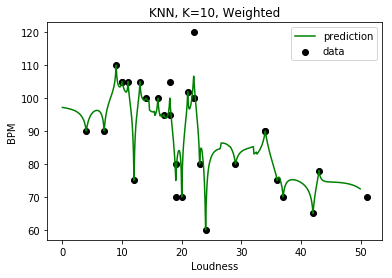

In [5]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

print (X)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

print (T)

print (T.shape)

Y_ = knn_w.predict(T)

print (Y_)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.xlabel('Loudness')
plt.ylabel('BPM')
plt.title('KNN, K=10, Weighted')
plt.show()

In [6]:
from sklearn.model_selection import cross_val_score

#cv : int, cross-validation generator or an iterable, optional
#Determines the cross-validation splitting strategy. Possible inputs for cv are:

#None, to use the default 3-fold cross validation,
#integer, to specify the number of folds in a (Stratified)KFold,
#CV splitter,
#An iterable yielding (train, test) splits as arrays of indices.

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


### For accuracy scores listed above:
### scores : array of float, shape=(len(list(cv)),)
### Array of scores of the estimator for each run of the cross validation.

### Why don't you add the other feature and mess around with  𝑘  and weighting to see if you can do any better than we've done so far?

### Replacing column loudness with column duration for this iteration.

    duration
0        184
1        134
2        243
3        186
4        122
5        197
6        294
7        382
8        102
9        264
10       205
11       110
12       307
13       110
14       397
15       153
16       190
17       192
18       210
19       403
20       164
21       198
22       204
23       253
24       234
25       190
26       182
27       401
28       376
29       102
[[  0.00000000e+00]
 [  1.00000000e-01]
 [  2.00000000e-01]
 ..., 
 [  3.99700000e+02]
 [  3.99800000e+02]
 [  3.99900000e+02]]
(4000, 1)
[ 96.5  96.5  96.5 ...,  85.8  85.8  85.8]


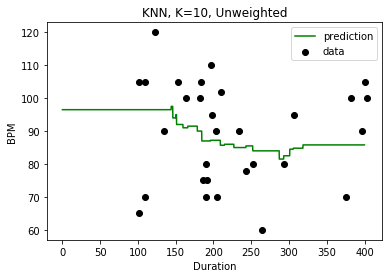

In [7]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.duration)
Y = music.bpm
knn.fit(X, Y)

print(X)

# Set up our prediction line.
#numpy.arange([start, ]stop, [step, ]dtype=None)
T = np.arange(0, 400, 0.1)[:, np.newaxis]

print (T)

print (T.shape)

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

print (Y_)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.xlabel('Duration')
plt.ylabel('BPM')
plt.title('KNN, K=10, Unweighted')
plt.show()

    duration
0        184
1        134
2        243
3        186
4        122
5        197
6        294
7        382
8        102
9        264
10       205
11       110
12       307
13       110
14       397
15       153
16       190
17       192
18       210
19       403
20       164
21       198
22       204
23       253
24       234
25       190
26       182
27       401
28       376
29       102
[[  0.00000000e+00]
 [  1.00000000e-01]
 [  2.00000000e-01]
 ..., 
 [  3.99700000e+02]
 [  3.99800000e+02]
 [  3.99900000e+02]]
(4000, 1)
[ 95.16659988  95.16555414  95.16450671 ...,  98.77506226  99.09907447
  99.43355397]


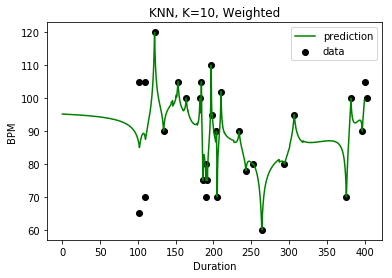

In [8]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.duration)
Y = music.bpm
knn_w.fit(X, Y)

print (X)

# Set up our prediction line.
T = np.arange(0, 400, 0.1)[:, np.newaxis]

print (T)

print (T.shape)

Y_ = knn_w.predict(T)

print (Y_)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.xlabel('Duration')
plt.ylabel('BPM')
plt.title('KNN, K=10, Weighted')
plt.show()

In [9]:
from sklearn.model_selection import cross_val_score

#cv : int, cross-validation generator or an iterable, optional
#Determines the cross-validation splitting strategy. Possible inputs for cv are:

#None, to use the default 3-fold cross validation,
#integer, to specify the number of folds in a (Stratified)KFold,
#CV splitter,
#An iterable yielding (train, test) splits as arrays of indices.

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.44 (+/- 0.81)
Weighted Accuracy: -0.78 (+/- 0.77)


### ***Building a new model incorporating another column into X***

In [10]:
# Build our model adding the other feature: duration so that X is composed of 2 columns vs 1 column of the previous
# models.  Keeping n_neighbors to 10 as above models.
knn2 = neighbors.KNeighborsRegressor(n_neighbors=10)
X = music[['loudness', 'duration']]

Y = music[['bpm']]


print (X)
print (Y)

print (X.shape)
print (Y.shape)

    loudness  duration
0         18       184
1         34       134
2         43       243
3         36       186
4         22       122
5          9       197
6         29       294
7         22       382
8         10       102
9         24       264
10        20       205
11        10       110
12        17       307
13        51       110
14         7       397
15        13       153
16        19       190
17        12       192
18        21       210
19        22       403
20        16       164
21        18       198
22         4       204
23        23       253
24        34       234
25        19       190
26        14       182
27        11       401
28        37       376
29        42       102
    bpm
0   105
1    90
2    78
3    75
4   120
5   110
6    80
7   100
8   105
9    60
10   70
11  105
12   95
13   70
14   90
15  105
16   70
17   75
18  102
19  100
20  100
21   95
22   90
23   80
24   90
25   80
26  100
27  105
28   70
29   65
(30, 2)
(30, 1)


### fitting the knn model with X composed of 2 columns of data ( loudness, and duration).

In [11]:
knn2.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

### Important thing here is the 2 columns of the X.shape.

In [12]:
# Set up our prediction line.  Trying to take into account that there are 2 columns now to think about.
T = np.arange(0, 400, 0.1)[:, np.newaxis]
T2 = np.arange(0, 400, 0.1)[:, np.newaxis]

### Concatenating T and T2 into a new variable T3

In [13]:
np.concatenate((T,T2), axis=1)
T3 = np.concatenate((T,T2), axis=1)

In [14]:
print (T3)

[[  0.00000000e+00   0.00000000e+00]
 [  1.00000000e-01   1.00000000e-01]
 [  2.00000000e-01   2.00000000e-01]
 ..., 
 [  3.99700000e+02   3.99700000e+02]
 [  3.99800000e+02   3.99800000e+02]
 [  3.99900000e+02   3.99900000e+02]]


In [15]:
print (T3.shape) #(rows, columns)

(4000, 2)


### predicting the knn model with X composed of 2 columns of data ( loudness, and duration) called knn2.

In [16]:
# Trailing underscores are a common convention for a prediction.
Y2_ = knn2.predict(T3)

In [17]:
print (Y2_)

[[ 96.5]
 [ 96.5]
 [ 96.5]
 ..., 
 [ 86.8]
 [ 86.8]
 [ 86.8]]


In [18]:
X1 = X.loudness
X2 = X.duration

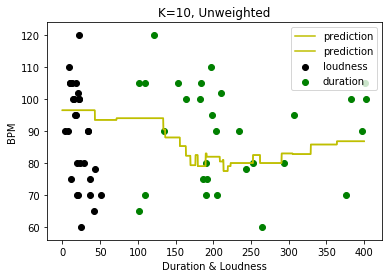

In [19]:
plt.scatter(X1, Y, c='k', label='loudness')
plt.scatter(X2, Y, c='g', label='duration')
plt.plot(T3, Y2_, c='y', label='prediction')
plt.legend()
plt.xlabel('Duration & Loudness')
plt.ylabel('BPM')
plt.title('K=10, Unweighted')
plt.show()

In [20]:
# Run the same model, this time with weights.
knn_w2 = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')

In [21]:
knn_w2.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

In [22]:
# Trailing underscores are a common convention for a prediction.
Y2_w = knn_w2.predict(T3)

In [23]:
print (Y2_w)

[[ 95.69968811]
 [ 95.69793692]
 [ 95.69618024]
 ..., 
 [ 86.80321915]
 [ 86.80346683]
 [ 86.80371423]]


In [24]:
from sklearn.model_selection import cross_val_score

#cv : int, cross-validation generator or an iterable, optional
#Determines the cross-validation splitting strategy. Possible inputs for cv are:

#None, to use the default 3-fold cross validation,
#integer, to specify the number of folds in a (Stratified)KFold,
#CV splitter,
#An iterable yielding (train, test) splits as arrays of indices.

score2 = cross_val_score(knn2, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score2.mean(), score2.std() * 2))

score_w2 = cross_val_score(knn_w2, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w2.mean(), score_w2.std() * 2))

Unweighted Accuracy: -0.42 (+/- 0.78)
Weighted Accuracy: -0.26 (+/- 0.74)


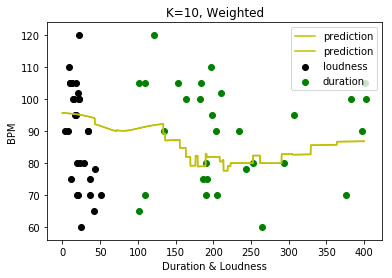

In [25]:
plt.scatter(X1, Y, c='k', label='loudness')
plt.scatter(X2, Y, c='g', label='duration')
plt.plot(T3, Y2_w, c='y', label='prediction')
plt.legend()
plt.xlabel('Duration & Loudness')
plt.ylabel('BPM')
plt.title('K=10, Weighted')
plt.show()

[[ 95.69968811]
 [ 95.69793692]
 [ 95.69618024]
 ..., 
 [ 86.80321915]
 [ 86.80346683]
 [ 86.80371423]]
Unweighted Accuracy: -0.42 (+/- 0.78)
Weighted Accuracy: -0.26 (+/- 0.74)


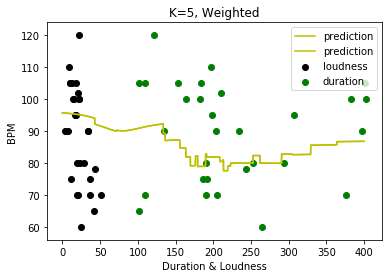

In [26]:
# Run the same model, this time with weights.
knn_w5 = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')

knn_w5.fit(X, Y)

# Trailing underscores are a common convention for a prediction.
Y5_w = knn_w2.predict(T3)

print (Y5_w)

score5 = cross_val_score(knn2, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score2.mean(), score2.std() * 2))

score_w5 = cross_val_score(knn_w5, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w2.mean(), score_w2.std() * 2))

plt.scatter(X1, Y, c='k', label='loudness')
plt.scatter(X2, Y, c='g', label='duration')
plt.plot(T3, Y5_w, c='y', label='prediction')
plt.legend()
plt.xlabel('Duration & Loudness')
plt.ylabel('BPM')
plt.title('K=5, Weighted')
plt.show()

### Why don't you add the other feature and mess around with  𝑘  and weighting to see if you can do any better than we've done so far?  Doesn't look like it made much of a difference in the end.